Acknowledgement 

1.   https://www.udemy.com/coursepytorch-for-deep-learning-with-python-bootcamp/
2.   https://www.kaggle.com/c/new-york-city-taxi-fare-prediction


In [1]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('/content/NYCTaxiFares.csv')

In [3]:
data.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [4]:
data['fare_amount'].describe()

count    120000.000000
mean         10.040326
std           7.500134
min           2.500000
25%           5.700000
50%           7.700000
75%          11.300000
max          49.900000
Name: fare_amount, dtype: float64

In [5]:
def haversine_distance(data,lat1,long1,lat2,long2):

  r = 6371
  phi1=np.radians(data[lat1])
  phi2=np.radians(data[lat2])

  lambda1 = np.radians(data[long1])
  lambda2 = np.radians(data[long2])

  delta_phi=phi2-phi1
  delta_lambda=lambda2-lambda1

  a = np.sin(delta_phi/2)**2 + np.cos(phi1)*np.cos(phi2)*np.sin(delta_lambda/2)**2
  c = 2*np.arcsin(np.sqrt(a))
  d = r * c

  return d

In [6]:
data['distance_km']=haversine_distance(data,
                                       'pickup_latitude',
                                       'pickup_longitude',
                                       'dropoff_latitude',
                                       'dropoff_longitude')

In [7]:
data.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'distance_km'],
      dtype='object')

In [8]:
data.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_datetime    120000 non-null  object 
 1   fare_amount        120000 non-null  float64
 2   fare_class         120000 non-null  int64  
 3   pickup_longitude   120000 non-null  float64
 4   pickup_latitude    120000 non-null  float64
 5   dropoff_longitude  120000 non-null  float64
 6   dropoff_latitude   120000 non-null  float64
 7   passenger_count    120000 non-null  int64  
 8   distance_km        120000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 8.2+ MB


In [10]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   pickup_datetime    120000 non-null  datetime64[ns, UTC]
 1   fare_amount        120000 non-null  float64            
 2   fare_class         120000 non-null  int64              
 3   pickup_longitude   120000 non-null  float64            
 4   pickup_latitude    120000 non-null  float64            
 5   dropoff_longitude  120000 non-null  float64            
 6   dropoff_latitude   120000 non-null  float64            
 7   passenger_count    120000 non-null  int64              
 8   distance_km        120000 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(2)
memory usage: 8.2 MB


In [12]:
data.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [13]:
my_time = data['pickup_datetime'][0]

In [14]:
my_time.hour

8

In [15]:
pd.Timedelta(hours=4)

Timedelta('0 days 04:00:00')

In [16]:
data['EDTdate']=data['pickup_datetime'] - pd.Timedelta(hours=4)

In [17]:
data['Hour'] = data['EDTdate'].dt.hour 

In [18]:
data['AMorPM'] = np.where(data['Hour']<12,'am','pm')

In [19]:
data.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,EDTdate,Hour,AMorPM
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4,am
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11,am
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7,am
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17,pm
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22,pm


In [20]:
data['Weekday']=data['EDTdate'].dt.strftime("%a")

In [21]:
data.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,EDTdate,Hour,AMorPM,Weekday
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4,am,Mon
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11,am,Sat
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7,am,Sat
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17,pm,Sun
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22,pm,Fri


In [22]:
cat_cols  = ['Hour','AMorPM','Weekday']

cont_cols = ['pickup_longitude',
             'pickup_latitude', 
             'dropoff_longitude', 
             'dropoff_latitude']

In [23]:
y_cols = ['fare_amount']

In [24]:
data.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
distance_km                      float64
EDTdate              datetime64[ns, UTC]
Hour                               int64
AMorPM                            object
Weekday                           object
dtype: object

In [25]:
for cat in cat_cols:
  data[cat] = data[cat].astype('category')

In [26]:
data.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
distance_km                      float64
EDTdate              datetime64[ns, UTC]
Hour                            category
AMorPM                          category
Weekday                         category
dtype: object

In [27]:
data['Hour'].head()

0     4
1    11
2     7
3    17
4    22
Name: Hour, dtype: category
Categories (24, int64): [0, 1, 2, 3, ..., 20, 21, 22, 23]

In [28]:
data['AMorPM'].head()

0    am
1    am
2    am
3    pm
4    pm
Name: AMorPM, dtype: category
Categories (2, object): ['am', 'pm']

In [29]:
data['Weekday'].head()

0    Mon
1    Sat
2    Sat
3    Sun
4    Fri
Name: Weekday, dtype: category
Categories (7, object): ['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed']

In [30]:
data['AMorPM'].cat.categories

Index(['am', 'pm'], dtype='object')

In [31]:
data['AMorPM'].cat.codes

0         0
1         0
2         0
3         1
4         1
         ..
119995    0
119996    0
119997    1
119998    0
119999    1
Length: 120000, dtype: int8

In [32]:
data['Weekday'].cat.categories

Index(['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'], dtype='object')

In [33]:
data['Weekday'].cat.codes

0         1
1         2
2         2
3         3
4         0
         ..
119995    3
119996    0
119997    3
119998    5
119999    2
Length: 120000, dtype: int8

In [34]:
data['Weekday'].cat.codes.values

array([1, 2, 2, ..., 3, 5, 2], dtype=int8)

In [35]:
hr   = data['Hour'].cat.codes.values
ampm = data['AMorPM'].cat.codes.values
wkdy = data['Weekday'].cat.codes.values

In [36]:
hr

array([ 4, 11,  7, ..., 14,  4, 12], dtype=int8)

In [37]:
cats = np.stack([hr,ampm,wkdy],axis=1)

In [38]:
cats

array([[ 4,  0,  1],
       [11,  0,  2],
       [ 7,  0,  2],
       ...,
       [14,  1,  3],
       [ 4,  0,  5],
       [12,  1,  2]], dtype=int8)

In [39]:
cats = np.stack([data[col].cat.codes.values for col in cat_cols],1)

In [40]:
cats

array([[ 4,  0,  1],
       [11,  0,  2],
       [ 7,  0,  2],
       ...,
       [14,  1,  3],
       [ 4,  0,  5],
       [12,  1,  2]], dtype=int8)

In [41]:
cats = torch.tensor(cats,dtype=torch.int64)

In [42]:
cats

tensor([[ 4,  0,  1],
        [11,  0,  2],
        [ 7,  0,  2],
        ...,
        [14,  1,  3],
        [ 4,  0,  5],
        [12,  1,  2]])

In [43]:
conts = np.stack([data[col].values for col in cont_cols],axis=1)

In [44]:
conts

array([[-73.992365,  40.730521, -73.975499,  40.744746],
       [-73.990078,  40.740558, -73.974232,  40.744114],
       [-73.994149,  40.751118, -73.960064,  40.766235],
       ...,
       [-73.988574,  40.749772, -74.011541,  40.707799],
       [-74.004449,  40.724529, -73.992697,  40.730765],
       [-73.955415,  40.77192 , -73.967623,  40.763015]])

In [45]:
conts = torch.tensor(conts, dtype=torch.float)

In [46]:
conts

tensor([[-73.9924,  40.7305, -73.9755,  40.7447],
        [-73.9901,  40.7406, -73.9742,  40.7441],
        [-73.9941,  40.7511, -73.9601,  40.7662],
        ...,
        [-73.9886,  40.7498, -74.0115,  40.7078],
        [-74.0044,  40.7245, -73.9927,  40.7308],
        [-73.9554,  40.7719, -73.9676,  40.7630]])

In [47]:
y=torch.tensor(data[y_cols].values,dtype=torch.float)
y

tensor([[ 6.5000],
        [ 6.9000],
        [10.1000],
        ...,
        [12.5000],
        [ 4.9000],
        [ 5.3000]])

In [48]:
cats.shape

torch.Size([120000, 3])

In [49]:
conts.shape

torch.Size([120000, 4])

In [50]:
y.shape

torch.Size([120000, 1])

In [51]:
cat_szs = [len(data[col].cat.categories) for col in cat_cols]
cat_szs

[24, 2, 7]

In [52]:
emb_szs = [(size,min(50,(size+1)//2)) for size in cat_szs]
emb_szs

[(24, 12), (2, 1), (7, 4)]

In [53]:
catz = cats[:4]
catz

tensor([[ 4,  0,  1],
        [11,  0,  2],
        [ 7,  0,  2],
        [17,  1,  3]])

In [54]:
[nn.Embedding(ni,nf) for ni,nf in emb_szs]

[Embedding(24, 12), Embedding(2, 1), Embedding(7, 4)]

In [55]:
selfembeds = nn.ModuleList([nn.Embedding(ni,nf) for ni,nf in emb_szs])

In [56]:
selfembeds

ModuleList(
  (0): Embedding(24, 12)
  (1): Embedding(2, 1)
  (2): Embedding(7, 4)
)

In [57]:
embeddingz = []

for i,e in enumerate(selfembeds):
  embeddingz.append(e(catz[:,i]))

In [58]:
embeddingz

[tensor([[ 0.7535, -0.7188,  0.9724, -0.7886,  0.6488, -0.8027, -0.3194, -0.3621,
           1.3808, -0.0385, -0.5079,  0.8691],
         [-0.2298, -0.0177, -0.6118,  1.0456,  0.9475,  2.3795,  0.9926,  1.2969,
          -0.4839,  0.7889, -0.0409, -0.7502],
         [-0.3868,  0.2307,  1.0213,  1.2555, -0.7843,  0.8732,  1.1241,  0.5311,
           0.0305,  1.4566, -0.9905, -0.7272],
         [-3.4471,  0.0622, -0.7501, -2.0007, -0.4811,  1.3152,  0.3290, -0.7072,
          -0.2812,  0.1838, -0.2510, -0.3916]], grad_fn=<EmbeddingBackward>),
 tensor([[ 1.0486],
         [ 1.0486],
         [ 1.0486],
         [-0.8244]], grad_fn=<EmbeddingBackward>),
 tensor([[-0.8201,  0.0974, -0.9561,  2.1496],
         [ 0.8592, -1.6940, -0.0099, -0.7082],
         [ 0.8592, -1.6940, -0.0099, -0.7082],
         [ 0.3106,  0.1273,  1.0341,  0.1065]], grad_fn=<EmbeddingBackward>)]

In [59]:
z = torch.cat(embeddingz,1)
z

tensor([[ 0.7535, -0.7188,  0.9724, -0.7886,  0.6488, -0.8027, -0.3194, -0.3621,
          1.3808, -0.0385, -0.5079,  0.8691,  1.0486, -0.8201,  0.0974, -0.9561,
          2.1496],
        [-0.2298, -0.0177, -0.6118,  1.0456,  0.9475,  2.3795,  0.9926,  1.2969,
         -0.4839,  0.7889, -0.0409, -0.7502,  1.0486,  0.8592, -1.6940, -0.0099,
         -0.7082],
        [-0.3868,  0.2307,  1.0213,  1.2555, -0.7843,  0.8732,  1.1241,  0.5311,
          0.0305,  1.4566, -0.9905, -0.7272,  1.0486,  0.8592, -1.6940, -0.0099,
         -0.7082],
        [-3.4471,  0.0622, -0.7501, -2.0007, -0.4811,  1.3152,  0.3290, -0.7072,
         -0.2812,  0.1838, -0.2510, -0.3916, -0.8244,  0.3106,  0.1273,  1.0341,
          0.1065]], grad_fn=<CatBackward>)

In [60]:
selfembdrop = nn.Dropout(0.4)
selfembdrop

Dropout(p=0.4, inplace=False)

In [61]:
z = selfembdrop(z)

In [62]:
z

tensor([[ 1.2558, -1.1980,  1.6207, -0.0000,  1.0813, -1.3378, -0.5324, -0.6034,
          2.3013, -0.0641, -0.0000,  0.0000,  1.7476, -1.3668,  0.1623, -1.5936,
          0.0000],
        [-0.0000, -0.0295, -0.0000,  1.7427,  0.0000,  0.0000,  0.0000,  2.1614,
         -0.0000,  0.0000, -0.0681, -0.0000,  0.0000,  0.0000, -0.0000, -0.0000,
         -0.0000],
        [-0.0000,  0.0000,  1.7022,  0.0000, -0.0000,  1.4553,  1.8735,  0.0000,
          0.0508,  2.4277, -1.6508, -0.0000,  0.0000,  1.4320, -2.8234, -0.0165,
         -1.1803],
        [-5.7451,  0.1037, -0.0000, -0.0000, -0.8019,  2.1920,  0.0000, -1.1787,
         -0.0000,  0.3063, -0.4183, -0.0000, -0.0000,  0.0000,  0.0000,  0.0000,
          0.1775]], grad_fn=<MulBackward0>)

In [63]:
class TabularModel(nn.Module):
  
  def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
    super().__init__()
    self.embeds   = nn.ModuleList([nn.Embedding(ni,nf) for ni,nf in emb_szs])
    self.emb_drop = nn.Dropout(p)
    self.bn_cont  = nn.BatchNorm1d(n_cont)

    layerlist = []
    n_emb     = sum((nf for ni, nf in emb_szs))
    n_in      = n_emb + n_cont

    for i in layers:
      layerlist.append(nn.Linear(n_in,i))
      layerlist.append(nn.ReLU(inplace=True))
      layerlist.append(nn.BatchNorm1d(i))
      layerlist.append(nn.Dropout(p))
      n_in = i

    layerlist.append(nn.Linear(layers[-1],out_sz))

    self.layers = nn.Sequential(*layerlist)

  def forward(self,x_cat,x_cont):
    embeddings = []

    for i,e in enumerate(self.embeds):
      embeddings.append(e(x_cat[:,i]))

    x = torch.cat(embeddings,1)
    x = self.emb_drop(x)

    x_cont = self.bn_cont(x_cont)
    x      = torch.cat([x,x_cont],1)
    x      = self.layers(x)
    return x

In [64]:
torch.manual_seed(32)
model = TabularModel(emb_szs,conts.shape[1],1,[200,100],p=0.4)

In [65]:
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=21, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=1, bias=True)
  )
)

In [66]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [67]:
batch_size = 60000
test_size  = int(batch_size*0.2)

In [68]:
cat_train = cats[:batch_size-test_size]
cat_test  = cats[batch_size-test_size:batch_size]
con_train = conts[:batch_size-test_size]
con_test  = conts[batch_size-test_size:batch_size]

In [69]:
y_train = y[:batch_size-test_size]
y_test  = y[batch_size-test_size:batch_size]

In [70]:
len(cat_train)

48000

In [71]:
len(con_train)

48000

In [72]:
len(cat_test)

12000

In [74]:
import time

start_time = time.time()
epochs     = 300

losses     = []

for i in range(epochs):
  i += 1
  y_pred = model(cat_train,con_train)
  loss   = torch.sqrt(criterion(y_pred,y_train))
  losses.append(loss)

  if i%10==1:
    print(f'epoch: {i} loss is {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

duration = time.time() - start_time
print(f'Training took {duration/60} minutes')

epoch: 1 loss is 12.675896644592285
epoch: 11 loss is 12.099434852600098
epoch: 21 loss is 11.739874839782715
epoch: 31 loss is 11.474979400634766
epoch: 41 loss is 11.181541442871094
epoch: 51 loss is 10.822754859924316
epoch: 61 loss is 10.418407440185547
epoch: 71 loss is 10.054299354553223
epoch: 81 loss is 9.718748092651367
epoch: 91 loss is 9.42946720123291
epoch: 101 loss is 9.087749481201172
epoch: 111 loss is 8.735071182250977
epoch: 121 loss is 8.365433692932129
epoch: 131 loss is 7.922288417816162
epoch: 141 loss is 7.469334602355957
epoch: 151 loss is 6.987680435180664
epoch: 161 loss is 6.459850311279297
epoch: 171 loss is 5.9506964683532715
epoch: 181 loss is 5.469962120056152
epoch: 191 loss is 5.0028204917907715
epoch: 201 loss is 4.623488903045654
epoch: 211 loss is 4.312562465667725
epoch: 221 loss is 4.094128608703613
epoch: 231 loss is 3.965446949005127
epoch: 241 loss is 3.8638288974761963
epoch: 251 loss is 3.8455891609191895
epoch: 261 loss is 3.7791285514831543


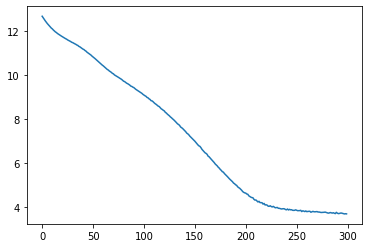

In [75]:
plt.plot(range(epochs),losses)

In [76]:
with torch.no_grad():
  y_val = model(cat_test,con_test)
  loss  = torch.sqrt(criterion(y_val,y_test))

In [77]:
loss

tensor(3.6127)

In [86]:
for i in range(10):
  diff = np.abs(y_val[i].item()-y_test[i].item())
  print(f'{i} Predicted:{y_val[i].item():8.2f} TRUE Value:{y_test[i].item():8.2f} DIFF: {diff:8.2f}')

0 Predicted:    3.63 TRUE Value:    2.90 DIFF:     0.73
1 Predicted:   27.01 TRUE Value:    5.70 DIFF:    21.31
2 Predicted:    3.54 TRUE Value:    7.70 DIFF:     4.16
3 Predicted:   11.14 TRUE Value:   12.50 DIFF:     1.36
4 Predicted:    4.37 TRUE Value:    4.10 DIFF:     0.27
5 Predicted:    4.43 TRUE Value:    5.30 DIFF:     0.87
6 Predicted:    4.07 TRUE Value:    3.70 DIFF:     0.37
7 Predicted:   12.25 TRUE Value:   14.50 DIFF:     2.25
8 Predicted:    5.05 TRUE Value:    5.70 DIFF:     0.65
9 Predicted:   12.26 TRUE Value:   10.10 DIFF:     2.16


In [87]:
torch.save(model.state_dict(),'TaxiModel.pt')